In [1]:
import matplotlib # should be a recent version 3.6.3 or later
import sklearn # should be a recent version 1.2.0 or later
matplotlib.__version__, sklearn.__version__

('3.6.2', '1.2.0')

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.cm import get_cmap
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from scipy import linalg
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import mixture
from sklearn.decomposition import PCA

In [3]:
SEED = 156

# Import raw data

In [4]:
data_url = "https://raw.githubusercontent.com/thetestspecimen/notebooks/main/datasets/wine/wine.csv"
df = pd.read_csv(data_url, index_col=0)

# Review data characteristics

In [5]:
df.head(10)

alcohol  malic_acid   ash  alkalinity_of_ash  magnesium  \
wine_id                                                            
1          14.23        1.71  2.43               15.6        127   
2          13.20        1.78  2.14               11.2        100   
3          13.16        2.36  2.67               18.6        101   
4          14.37        1.95  2.50               16.8        113   
5          13.24        2.59  2.87               21.0        118   
6          14.20        1.76  2.45               15.2        112   
7          14.39        1.87  2.45               14.6         96   
8          14.06        2.15  2.61               17.6        121   
9          14.83        1.64  2.17               14.0         97   
10         13.86        1.35  2.27               16.0         98   

         total_phenols  flavonoids  non_flavonoid_phenols  proanthocyanins  \
wine_id                                                                      
1                 2.80        3.06                   0.28             2.29   
2                 2.65        2.76                   0.26             1.28   
3                 2.80        3.24                   0.30             2.81   
4                 3.85        3.49                   0.24             2.18   
5                 2.80        2.69                   0.39             1.82   
6                 3.27        3.39                   0.34             1.97   
7                 2.50        2.52                   0.30             1.98   
8                 2.60        2.51                   0.31             1.25   
9                 2.80        2.98                   0.29             1.98   
10                2.98        3.15                   0.22             1.85   

         colour_intensity   hue  od_of_diluted_wines  proline  label  
wine_id                                                               
1                    5.64  1.04                 3.92     1065      1  
2                    4.38  1.05                 3.40     1050      1  
3                    5.68  1.03                 3.17     1185      1  
4                    7.80  0.86                 3.45     1480      1  
5                    4.32  1.04                 2.93      735      1  
6                    6.75  1.05                 2.85     1450      1  
7                    5.25  1.02                 3.58     1290      1  
8                    5.05  1.06                 3.58     1295      1  
9                    5.20  1.08                 2.85     1045      1  
10                   7.22  1.01                 3.55     1045      1

In [6]:
df.describe()

alcohol  malic_acid         ash  alkalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavonoids  non_flavonoid_phenols  proanthocyanins  \
count     178.000000  178.000000             178.000000       178.000000   
mean        2.295112    2.029270               0.361854         1.590899   
std         0.625851    0.998859               0.124453         0.572359   
min         0.980000    0.340000               0.130000         0.410000   
25%         1.742500    1.205000               0.270000         1.250000   
50%         2.355000    2.135000               0.340000         1.555000   
75%         2.800000    2.875000               0.437500         1.950000   
max         3.880000    5.080000               0.660000         3.580000   

       colour_intensity         hue  od_of_diluted_wines      proline  \
count        178.000000  178.000000           178.000000   178.000000   
mean           5.058090    0.957449             2.611685   746.893258   
std            2.318286    0.228572             0.709990   314.907474   
min            1.280000    0.480000             1.270000   278.000000   
25%            3.220000    0.782500             1.937500   500.500000   
50%            4.690000    0.965000             2.780000   673.500000   
75%            6.200000    1.120000             3.170000   985.000000   
max           13.000000    1.710000             4.000000  1680.000000   

            label  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 178
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   alcohol                178 non-null    float64
 1   malic_acid             178 non-null    float64
 2   ash                    178 non-null    float64
 3   alkalinity_of_ash      178 non-null    float64
 4   magnesium              178 non-null    int64  
 5   total_phenols          178 non-null    float64
 6   flavonoids             178 non-null    float64
 7   non_flavonoid_phenols  178 non-null    float64
 8   proanthocyanins        178 non-null    float64
 9   colour_intensity       178 non-null    float64
 10  hue                    178 non-null    float64
 11  od_of_diluted_wines    178 non-null    float64
 12  proline                178 non-null    int64  
 13  label                  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


# Scale the data

A simple minmax scaler will be used to get the data within the same range but without affecting the shape / distribution of the data.

In [8]:
scaler = MinMaxScaler()

In [9]:
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])
df

alcohol  malic_acid       ash  alkalinity_of_ash  magnesium  \
wine_id                                                                 
1        0.842105    0.191700  0.572193           0.257732   0.619565   
2        0.571053    0.205534  0.417112           0.030928   0.326087   
3        0.560526    0.320158  0.700535           0.412371   0.336957   
4        0.878947    0.239130  0.609626           0.319588   0.467391   
5        0.581579    0.365613  0.807487           0.536082   0.521739   
...           ...         ...       ...                ...        ...   
174      0.705263    0.970356  0.582888           0.510309   0.271739   
175      0.623684    0.626482  0.598930           0.639175   0.347826   
176      0.589474    0.699605  0.481283           0.484536   0.543478   
177      0.563158    0.365613  0.540107           0.484536   0.543478   
178      0.815789    0.664032  0.737968           0.716495   0.282609   

         total_phenols  flavonoids  non_flavonoid_phenols  proanthocyanins  \
wine_id                                                                      
1             0.627586    0.573840               0.283019         0.593060   
2             0.575862    0.510549               0.245283         0.274448   
3             0.627586    0.611814               0.320755         0.757098   
4             0.989655    0.664557               0.207547         0.558360   
5             0.627586    0.495781               0.490566         0.444795   
...                ...         ...                    ...              ...   
174           0.241379    0.056962               0.735849         0.205047   
175           0.282759    0.086498               0.566038         0.315457   
176           0.210345    0.073840               0.566038         0.296530   
177           0.231034    0.071730               0.754717         0.331230   
178           0.368966    0.088608               0.811321         0.296530   

         colour_intensity       hue  od_of_diluted_wines   proline  label  
wine_id                                                                    
1                0.372014  0.455285             0.970696  0.561341      1  
2                0.264505  0.463415             0.780220  0.550642      1  
3                0.375427  0.447154             0.695971  0.646933      1  
4                0.556314  0.308943             0.798535  0.857347      1  
5                0.259386  0.455285             0.608059  0.325963      1  
...                   ...       ...                  ...       ...    ...  
174              0.547782  0.130081             0.172161  0.329529      3  
175              0.513652  0.178862             0.106227  0.336662      3  
176              0.761092  0.089431             0.106227  0.397290      3  
177              0.684300  0.097561             0.128205  0.400856      3  
178              0.675768  0.105691             0.120879  0.201141      3  

[178 rows x 14 columns]

In [10]:
df.describe()

alcohol  malic_acid         ash  alkalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.518584    0.315484    0.538244           0.458502    0.323278   
std      0.213639    0.220780    0.146708           0.172142    0.155244   
min      0.000000    0.000000    0.000000           0.000000    0.000000   
25%      0.350658    0.170455    0.454545           0.340206    0.195652   
50%      0.531579    0.222332    0.534759           0.458763    0.304348   
75%      0.696711    0.462945    0.640374           0.561856    0.402174   
max      1.000000    1.000000    1.000000           1.000000    1.000000   

       total_phenols  flavonoids  non_flavonoid_phenols  proanthocyanins  \
count     178.000000  178.000000             178.000000       178.000000   
mean        0.453487    0.356386               0.437460         0.372523   
std         0.215811    0.210730               0.234818         0.180555   
min         0.000000    0.000000               0.000000         0.000000   
25%         0.262931    0.182489               0.264151         0.264984   
50%         0.474138    0.378692               0.396226         0.361199   
75%         0.627586    0.534810               0.580189         0.485804   
max         1.000000    1.000000               1.000000         1.000000   

       colour_intensity         hue  od_of_diluted_wines     proline  \
count        178.000000  178.000000           178.000000  178.000000   
mean           0.322363    0.388170             0.491460    0.334446   
std            0.197806    0.185831             0.260070    0.224613   
min            0.000000    0.000000             0.000000    0.000000   
25%            0.165529    0.245935             0.244505    0.158702   
50%            0.290956    0.394309             0.553114    0.282097   
75%            0.419795    0.520325             0.695971    0.504280   
max            1.000000    1.000000             1.000000    1.000000   

            label  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

# Explore the data

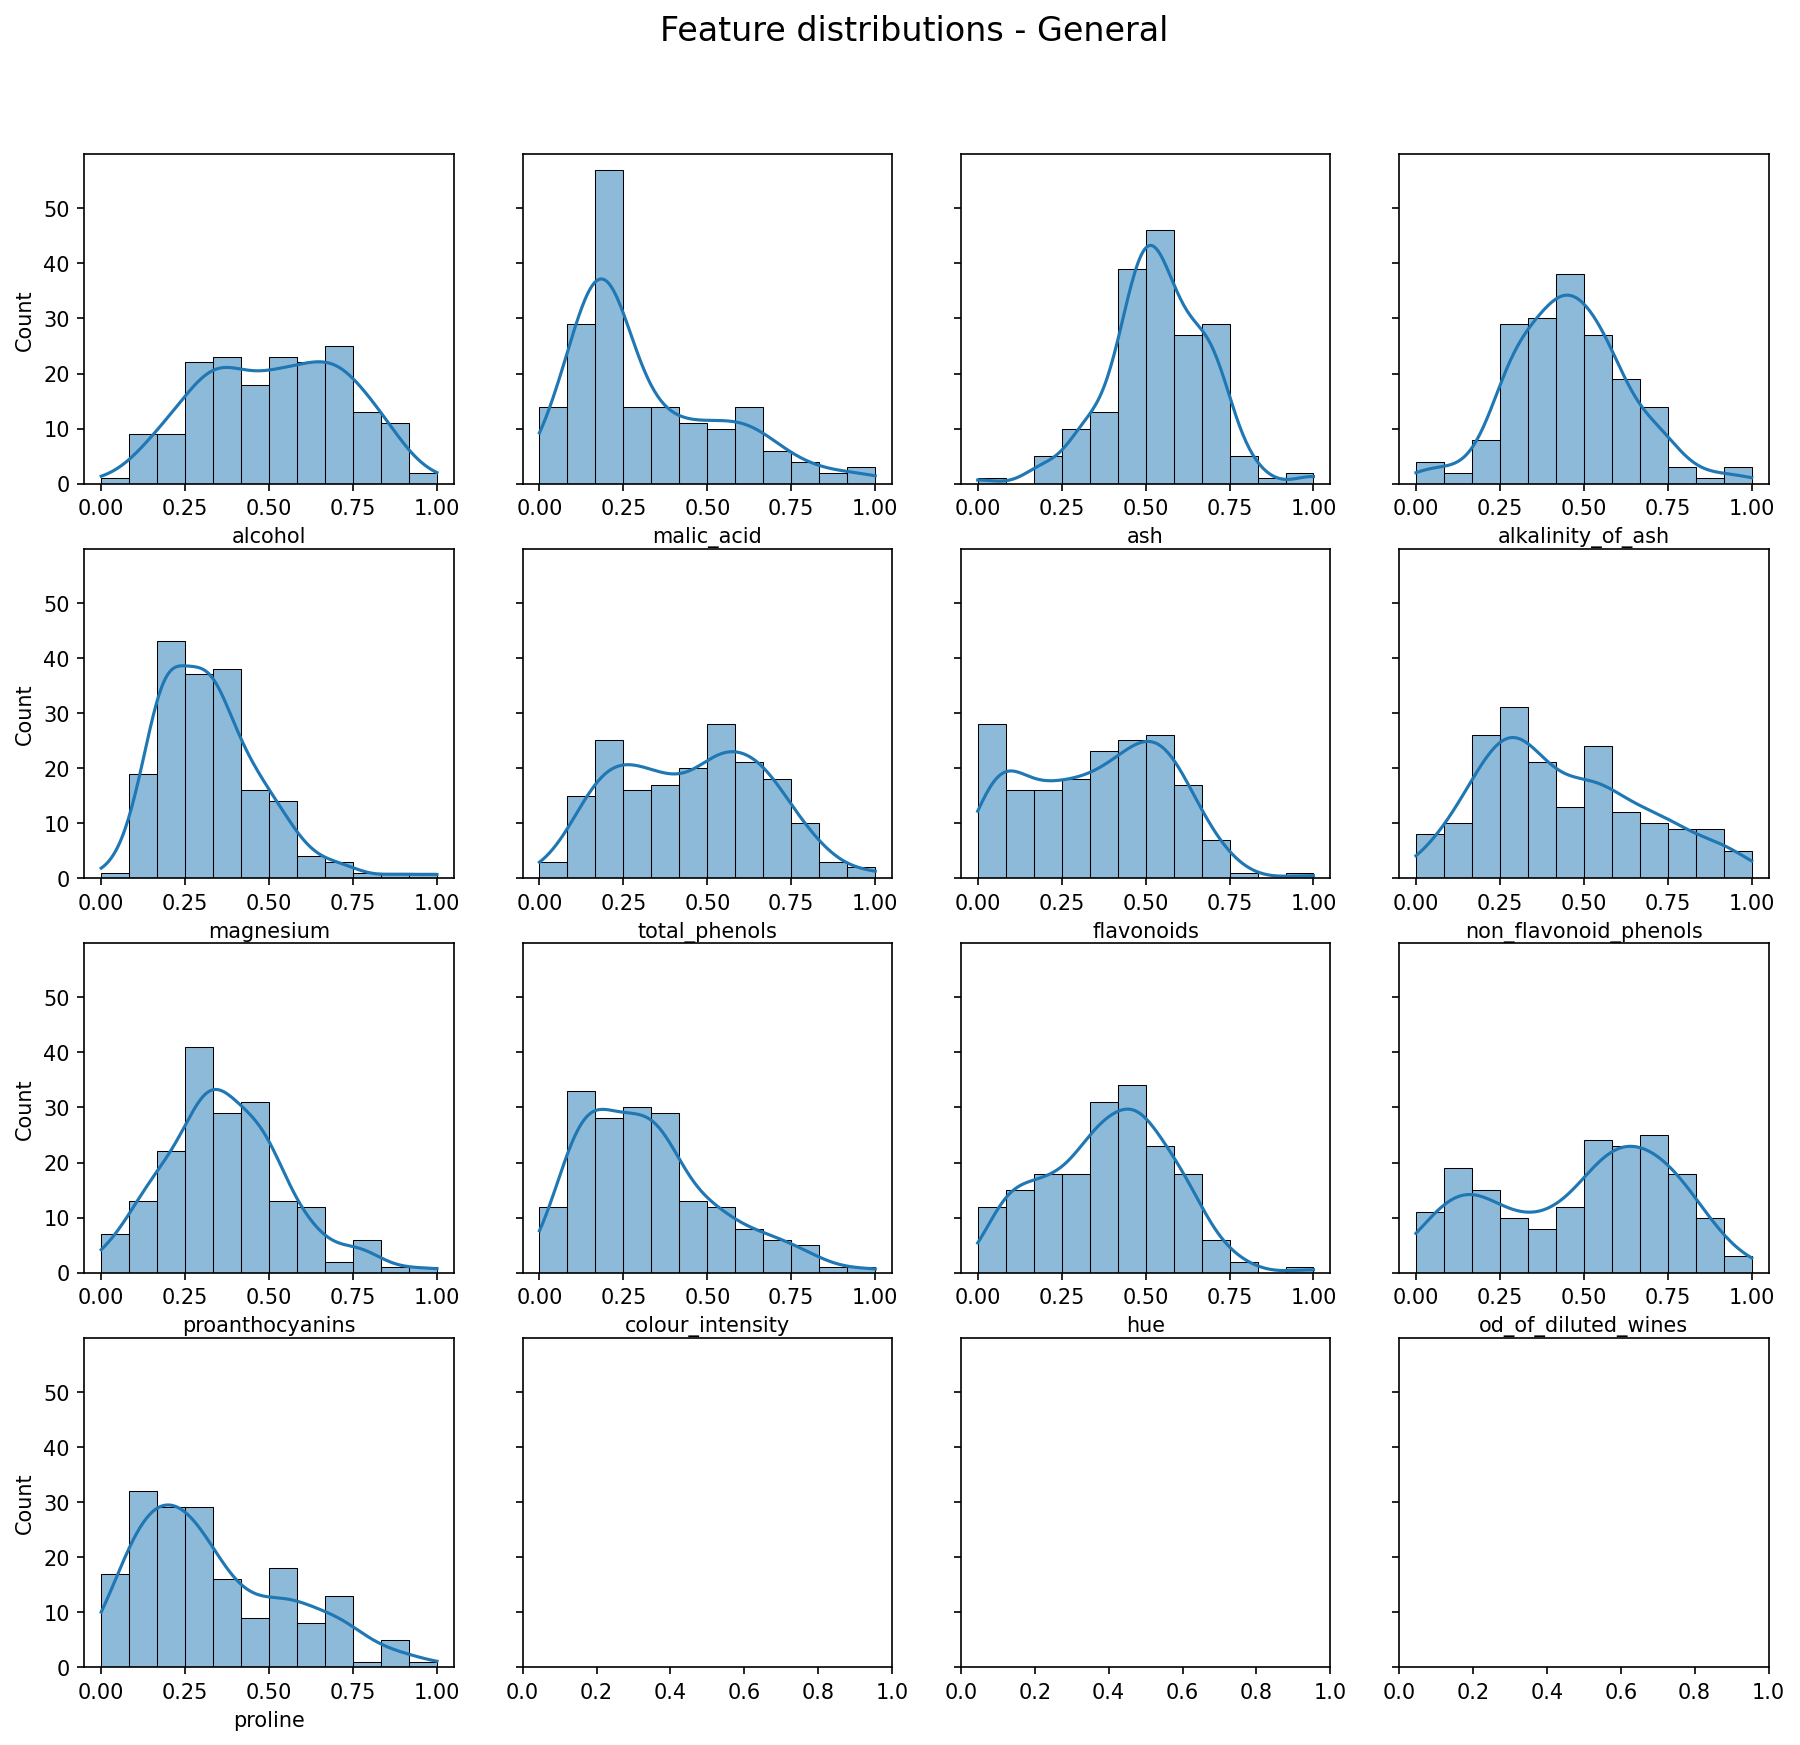

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey=True, figsize=(12,12), dpi=150)
fig.suptitle(f"Feature distributions - General", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

for i in np.arange(0, len(df.columns)-1):
    axis = fig.get_axes()[i]
    sns.histplot(data=df, x=df.iloc[:,i], bins=12, kde=True, linewidth=0.5, ax=axis)


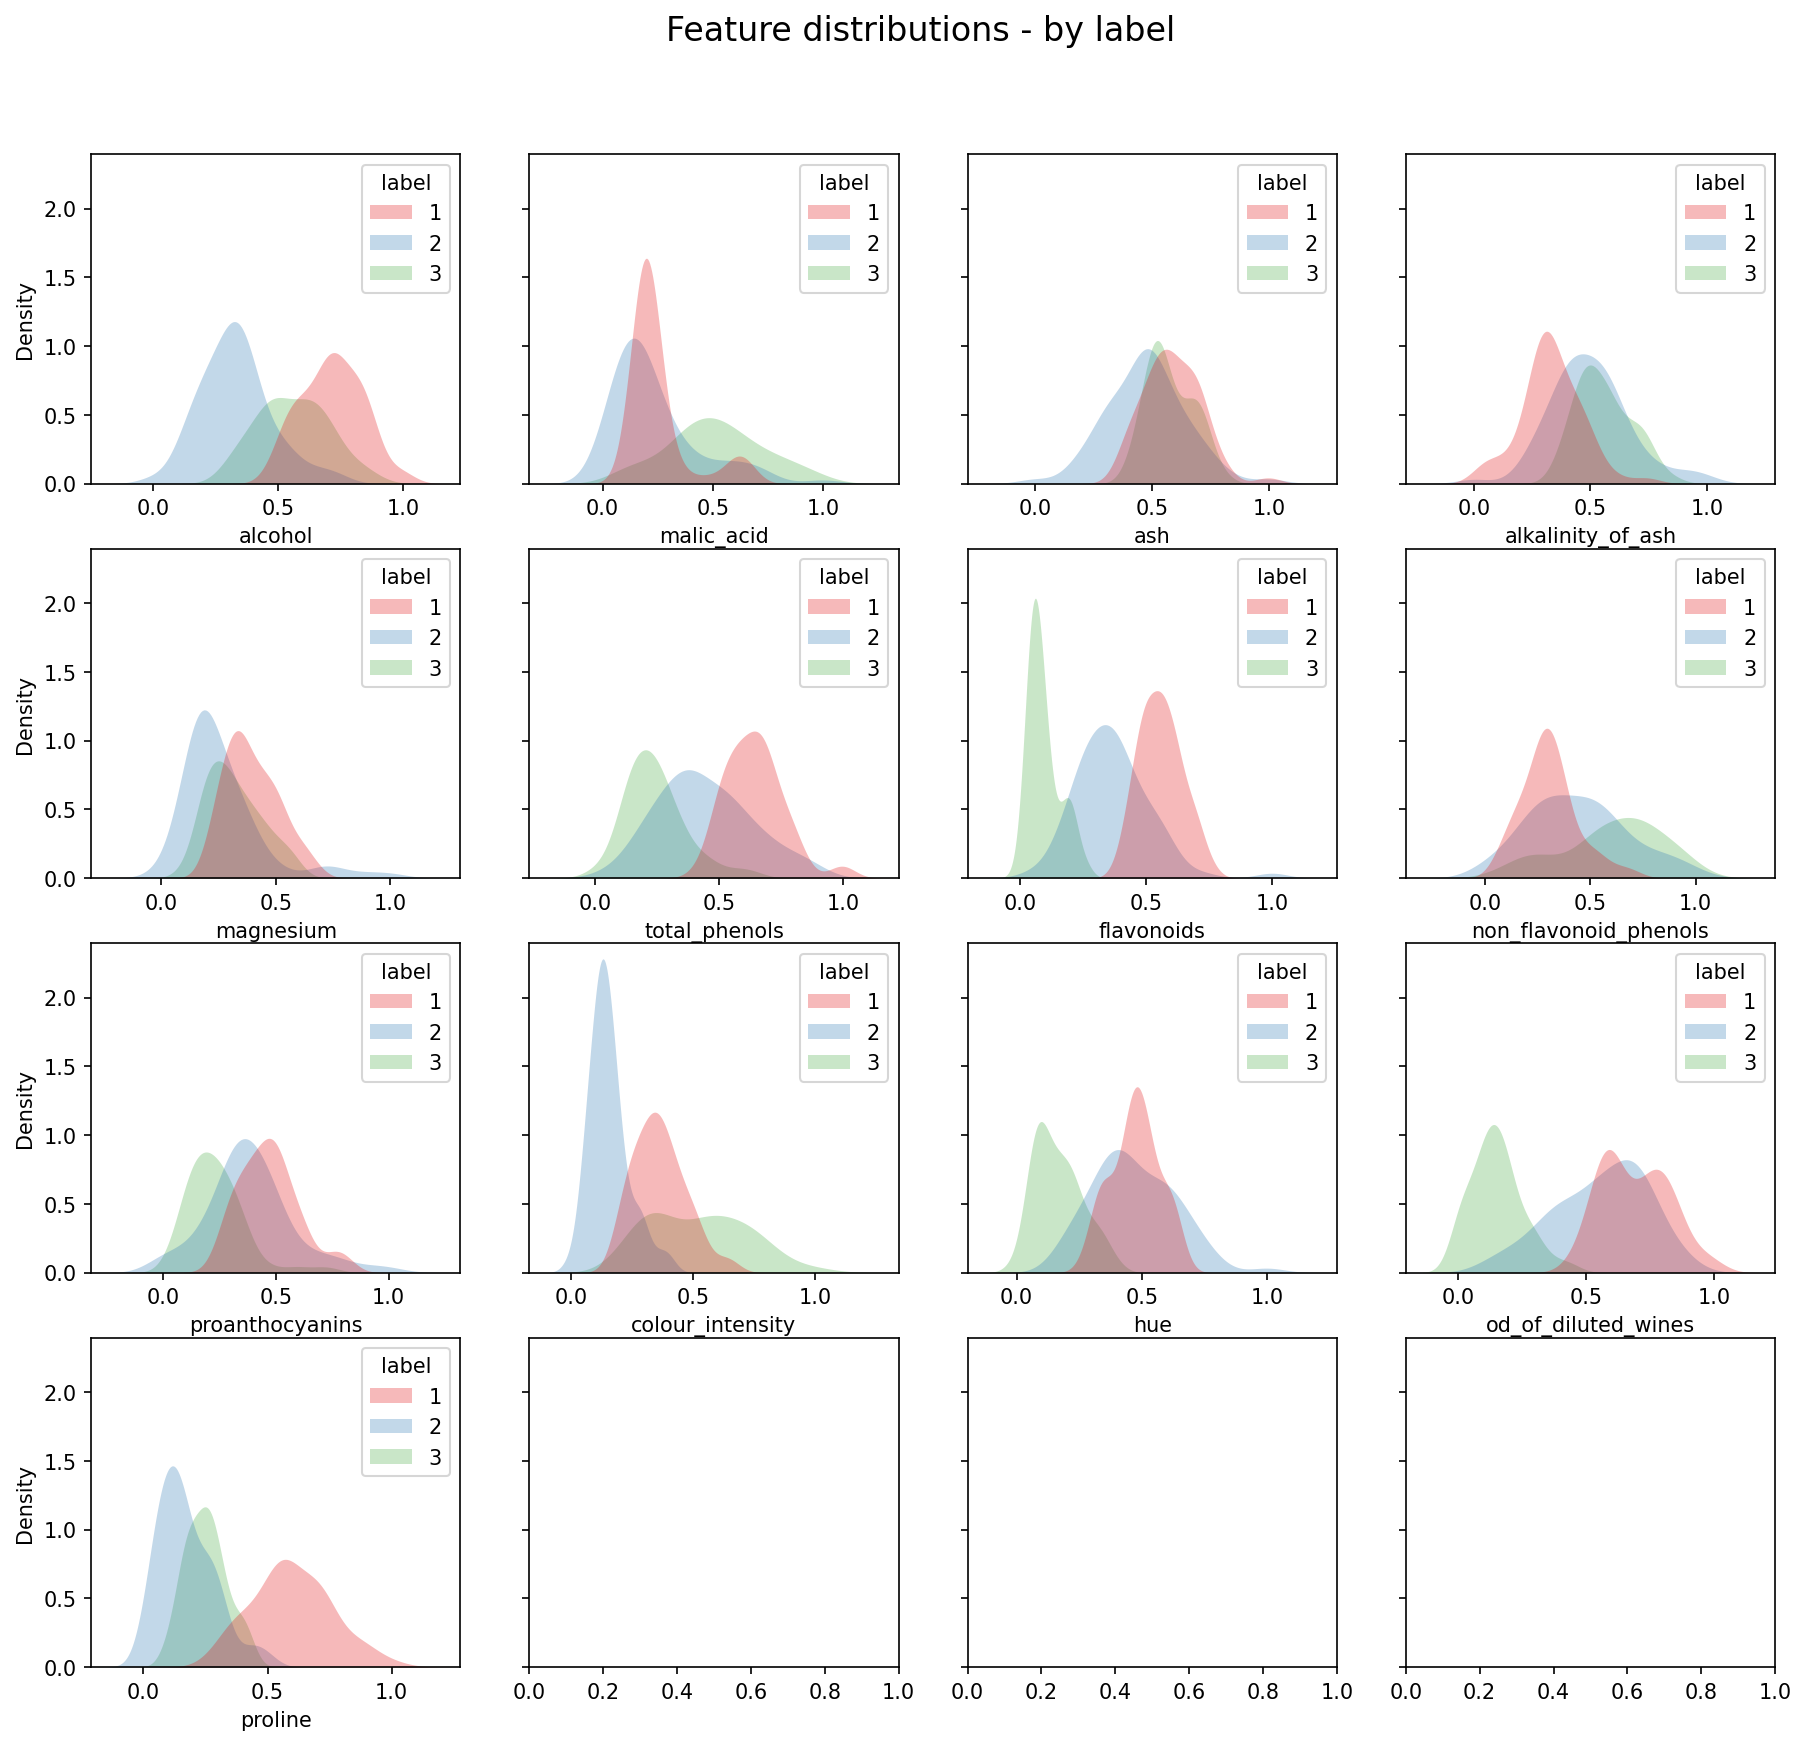

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey=True, figsize=(12,12), dpi=150)
fig.suptitle(f"Feature distributions - by label", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

for i in np.arange(0, len(df.columns)-1):
    axis = fig.get_axes()[i]
    sns.kdeplot(data=df, x=df.iloc[:,i], hue="label", fill=True, palette="Set1", alpha=.3, linewidth=0, ax=axis)

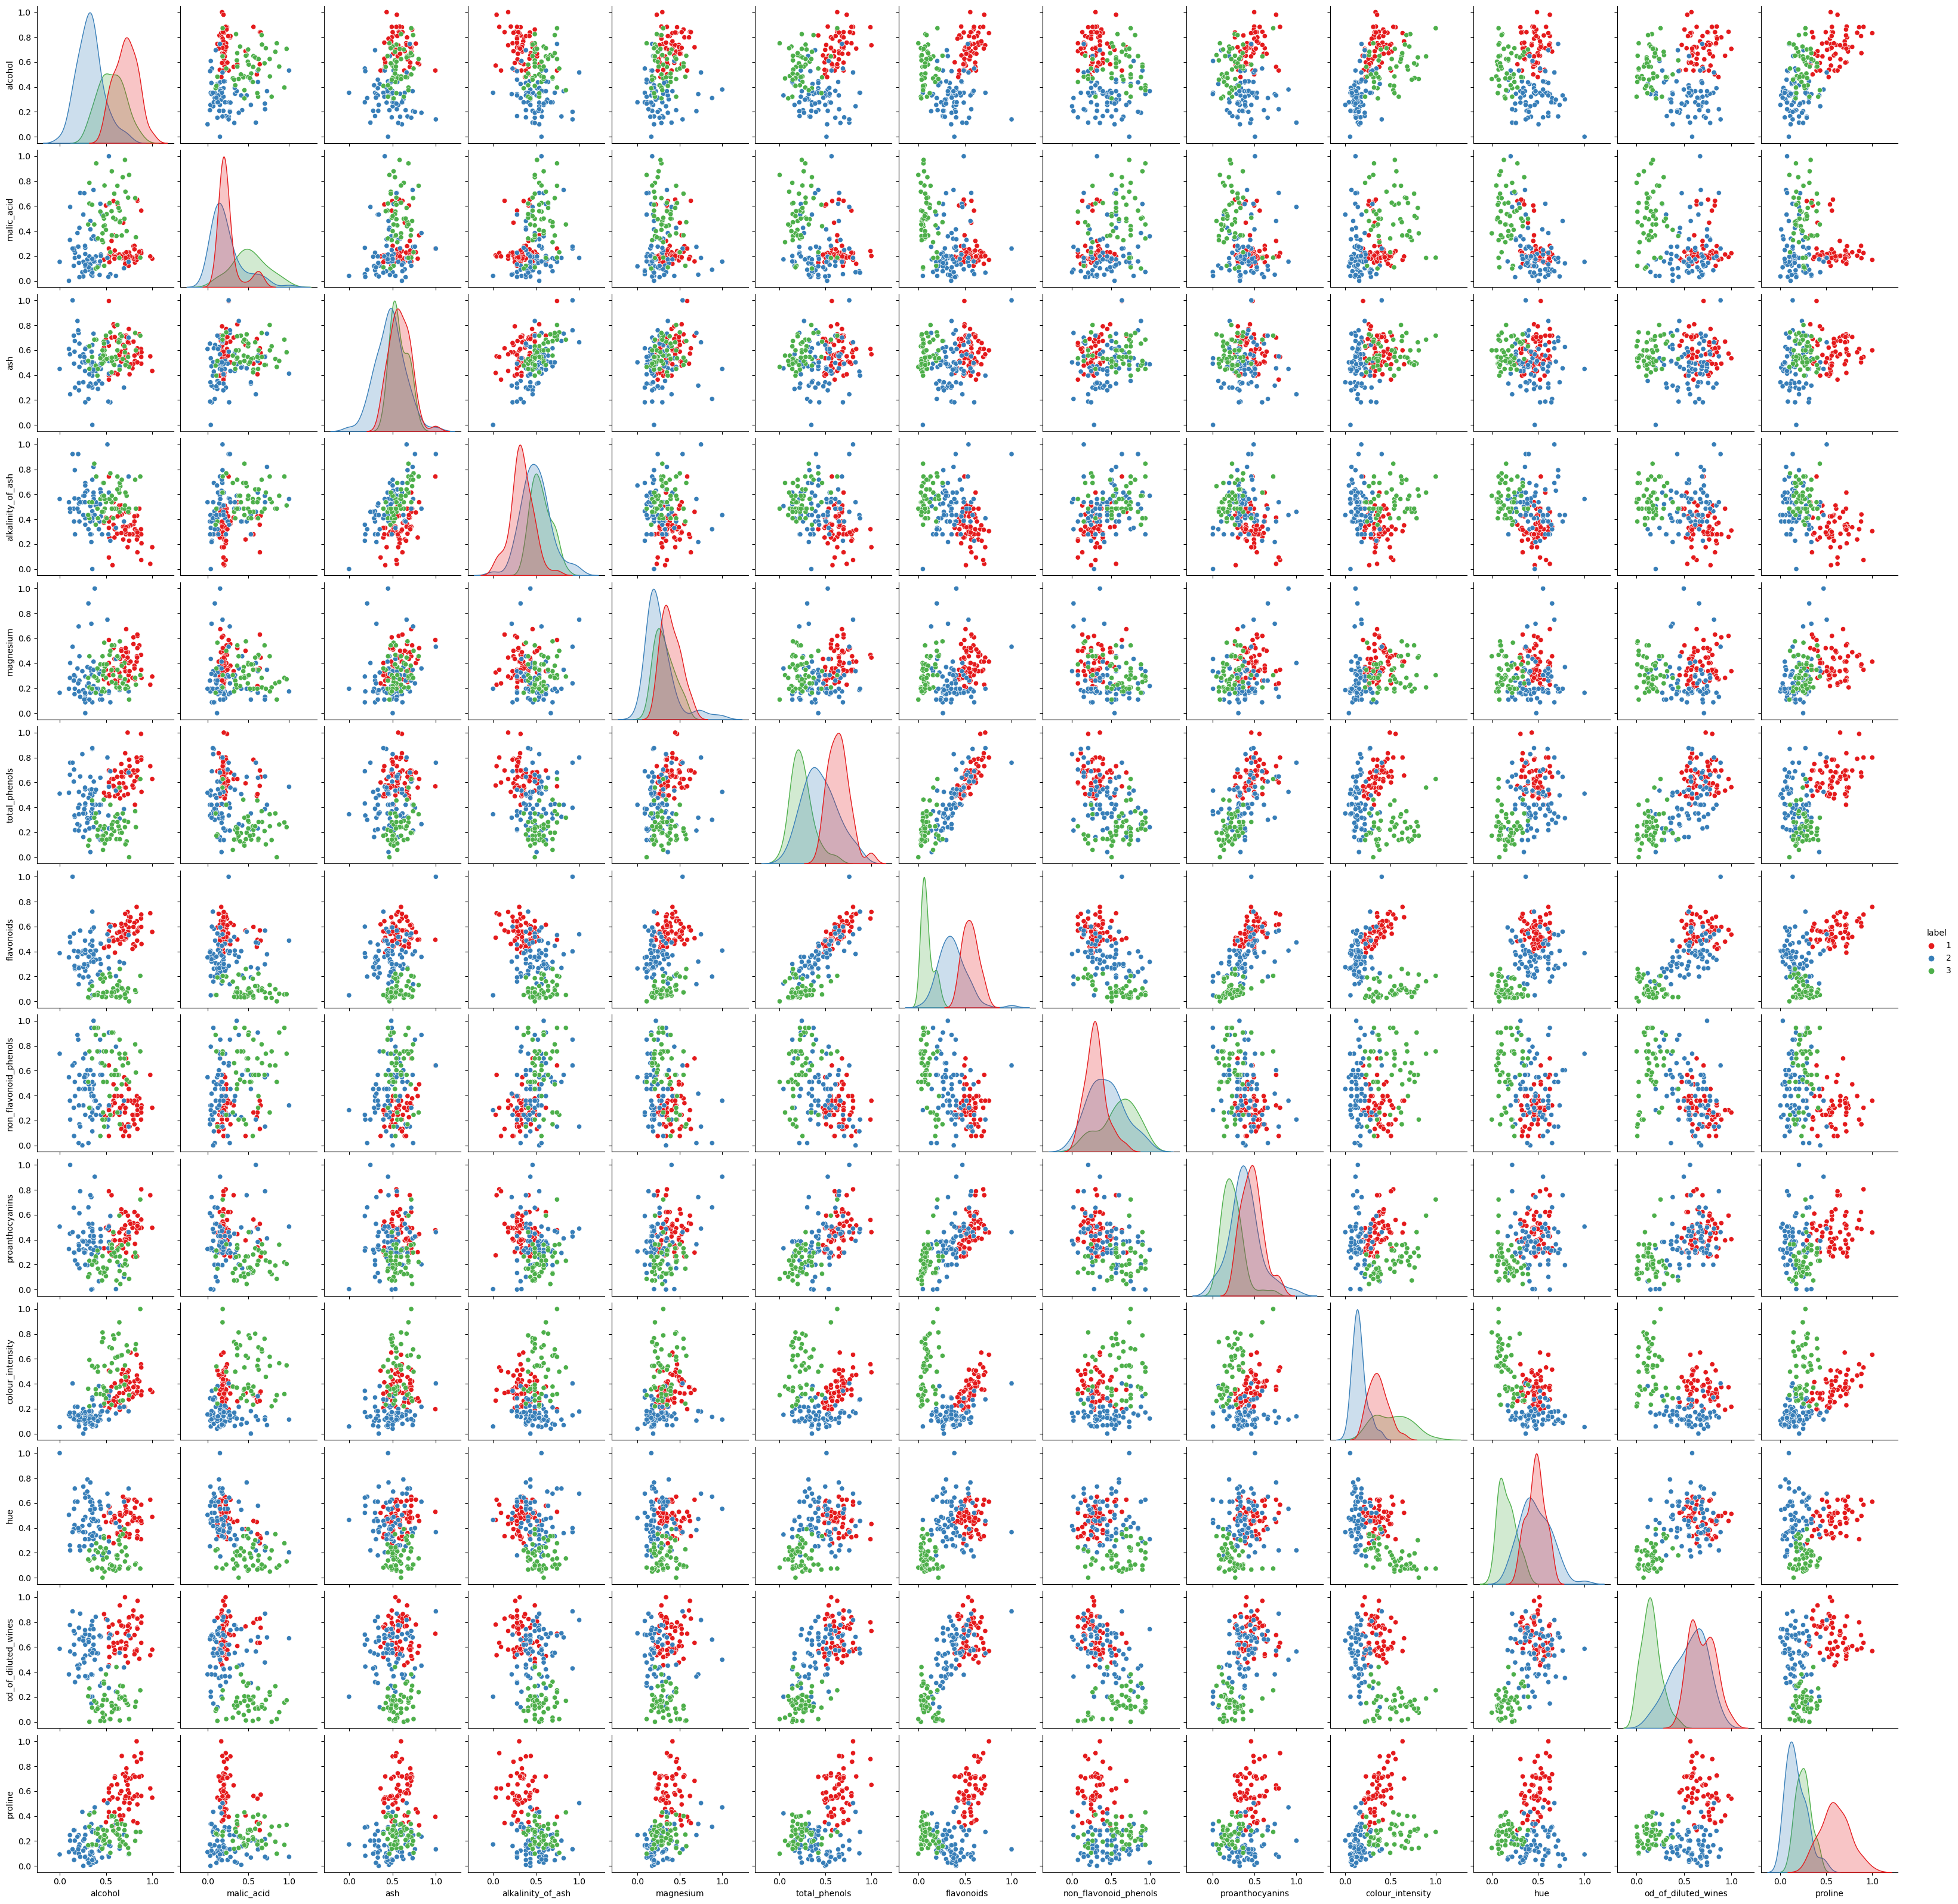

In [13]:
sns.pairplot(df, hue='label', palette='Set1')
plt.show()

## An example plot of the true data

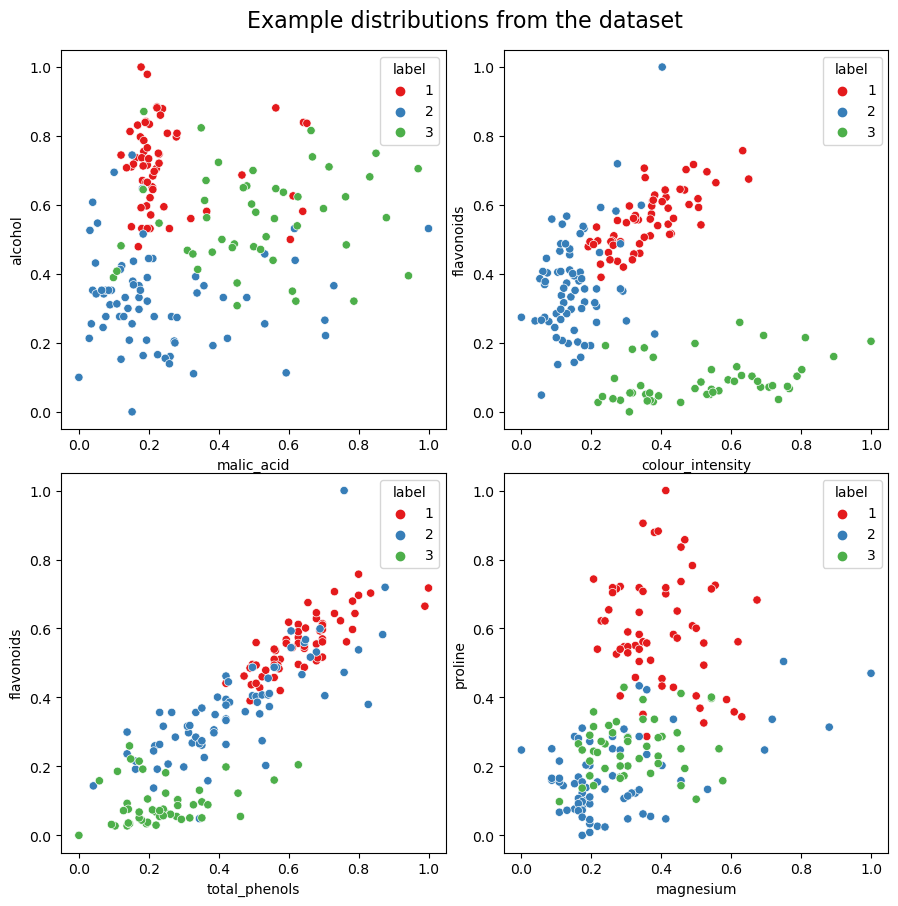

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(9,9), dpi=100)
fig.suptitle(f"Example distributions from the dataset", fontsize=16)
fig.tight_layout()

# random examples
sns.scatterplot(x = 'malic_acid', y = 'alcohol', hue='label', palette='Set1', data = df, ax=axes[0,0])
sns.scatterplot(x = 'colour_intensity', y = 'flavonoids', hue='label', palette='Set1', data = df, ax=axes[0,1])
sns.scatterplot(x = 'total_phenols', y = 'flavonoids', hue='label', palette='Set1', data = df, ax=axes[1,0])
sns.scatterplot(x = 'magnesium', y = 'proline', hue='label', palette='Set1', data = df, ax=axes[1,1])

plt.show()

# Separate the labels from the data

In [15]:
# true labels from original data
y_true = df.iloc[:,-1].to_numpy()
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

## Shuffling the data

At this point I would usually shuffle the data to ensure the ordering does not affect the outcome. However, the algorithms in this workbook do not gain any advantage from unshuffled data, so I will proceed without shuffling the data.

However, due to the unsupervised nature of the clusering algorithms used there is no guarentee that the labelling of the groups that are output by the algorithm will be in any way consistent with the real labels for comparison. 

As such, the following function will revert the ordering of the predictions to the same ordering as the real labels.

In [16]:
# this function sets the group
# names to the same as the labels

def fix_group_names(pred):

    # set groups to correct names
    # this assumes the first element of the unshuffled data
    # belongs to Groups 1 and the last element to Group 3.
    # For this dataset this is a safe assumption, but
    # this will not be the case for all datasets
    first_group = pred[0]
    last_group = pred[-1]
    cond_list = [pred==first_group, pred==last_group]
    choice_list = [1, 3]
    
    return np.select(cond_list,choice_list, default=2)


# Main analysis

In the section that follows the following algorithms will be run on all of the data (i.e. all the features together):

1. K-Means
2. Gaussian Mixture Model
3. Bayesian Gaussian Mixture Model (with dirichlet process)

As the number of groups is known from the labels (3 groups), there will be no investigation into the appropriate number of groups to allow us to concentrate on the algorithms themselves. 

## K-Means

In [17]:
k_means = KMeans(n_clusters=3, n_init='auto', random_state=SEED)

In [18]:
res_k_means = k_means.fit_predict(df.iloc[:,:-1])
res_k_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
pred_k_means = fix_group_names(res_k_means)
pred_k_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [20]:
acc_k_means = accuracy_score(y_true, pred_k_means)
f"{acc_k_means*100:.1f}%"

'94.9%'

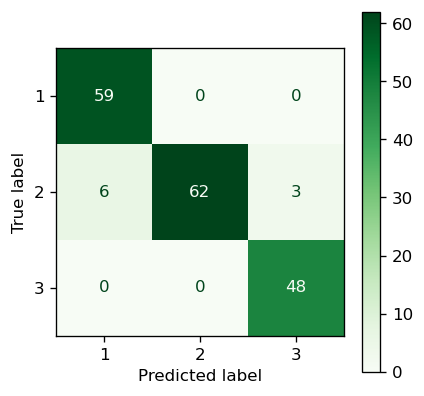

In [21]:
fig = plt.figure(figsize=(3,3), dpi=120)
axes = fig.add_axes([0,0,1,1])
cm = ConfusionMatrixDisplay.from_predictions(y_true, pred_k_means, cmap='Greens', ax=axes);

## Gaussian Mixture Model

The Bayesian Information Criterion (BIC) and the Akaike information criterion (AIC) are common methods of trying to infer how many clusters are appropriate for the underlying data.

As an additional reference we will generate these curves.

In [22]:
def get_bic_aic_curves(comps, data):

    bic = np.empty(comps, dtype=float)
    aic = np.empty(comps, dtype=float)

    for i in np.arange(1,comps+1):
        model = GaussianMixture(n_components=i, covariance_type='full', init_params='kmeans', random_state=SEED)
        model.fit(data)
        bic[i-1] = model.bic(data)
        aic[i-1] = model.aic(data)
    return bic, aic  

In [23]:
components = 8
bic, aic = get_bic_aic_curves(components, df.iloc[:,:-1])
stats = pd.DataFrame({"bic": bic, "aic": aic}, index=np.arange(1,components+1))
stats.index.name = "components"
stats

bic          aic
components                          
1          -1744.291249 -2075.196738
2          -1856.018483 -2521.011245
3          -1683.652869 -2682.732904
4          -1433.494673 -2766.661980
5          -1127.342434 -2794.597015
6           -738.396907 -2739.738760
7           -390.296761 -2725.725887
8           -299.807394 -2969.323793

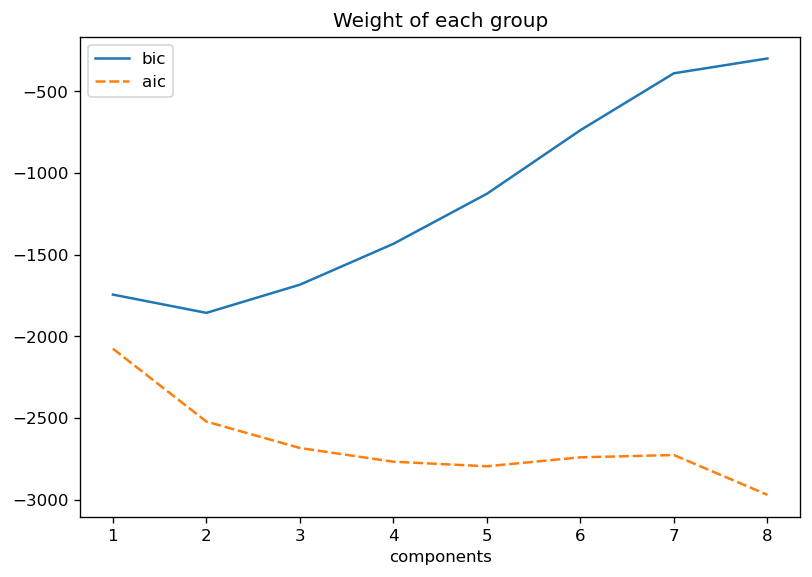

In [24]:
fig = plt.figure(figsize=(6,4), dpi=120)
axes = fig.add_axes([0,0,1,1])
sns.lineplot(data=stats, ax=axes)
plt.title('Weight of each group')
plt.show()

Although the suggestion of the BIC is two components we will proceed with the known three components for now. Please see the associated article for further discussion.

In [25]:
gauss = GaussianMixture(n_components=3, covariance_type='full', init_params='kmeans', random_state=SEED)

In [26]:
res_gauss = gauss.fit_predict(df.iloc[:,:-1])
res_gauss

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [27]:
pred_gauss = fix_group_names(res_gauss)
pred_gauss

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [28]:
acc_gauss = accuracy_score(y_true, pred_gauss)
f"{acc_gauss*100:.1f}%"

'96.6%'

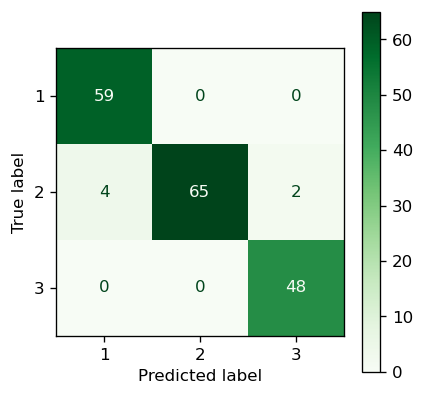

In [29]:
fig = plt.figure(figsize=(3,3), dpi=120)
axes = fig.add_axes([0,0,1,1])
cm = ConfusionMatrixDisplay.from_predictions(y_true, pred_gauss, cmap='Greens', ax=axes);

## Bayesian Gaussian Mixture

As the one of the advantages of bayesian gaussian mixing is the inclusion of the dirichlet process, it is possible to have the algorithm 'guess' the appropriate number of clusters based on the data.

To do this the following parameters must be set:

1. **n_components** - this is the number of groups that you want the algorithm to consider. However, the algorithm may return, or prefer, less groups than set here, which is one of the main advantages of this algorithm.

2. **covariance_type** - there are four options here full, tied, diag and spherical. The most 'accurate' and typically preferred is full. However, with smaller datasets it can tend to over-fit, so we will go with diag in this initial case and move to full later. This parameter essentially decides the limitation of the distribution fit shape.

3. **weight_concentration_prior_type** - this can either be dirichlet_process (infinite mixture model) or dirichlet_distribution (finite mixture model). In general, it is better to opt for the Dirichlet process as it is less sensitive to parameter changes, and does not tend to divide natural clusters into unnecessary sub-components as the Dirichlet distribution can sometimes do. 

4. **weight_concentration_prior** - specifying a low value (e.g. 0.01) will cause the model to set a larger number of components to zero leaving just a few components remaining with significant value. High values (e.g. 100000) will tend to allow a larger number of components to remain with relevant values i.e. less components will be set to zero.



In [30]:
bay_gauss = BayesianGaussianMixture(n_components=8, covariance_type='diag', weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=0.1, init_params='kmeans', random_state=12)

In [31]:
res_bay_gauss = bay_gauss.fit_predict(df.iloc[:,:-1])

### Review the weights decided by the Dirichlet Process

In [32]:
bay_gauss.weights_

array([0.06693358, 0.1898346 , 0.09928689, 0.28506637, 0.15933413,
       0.08034434, 0.00502212, 0.11417797])

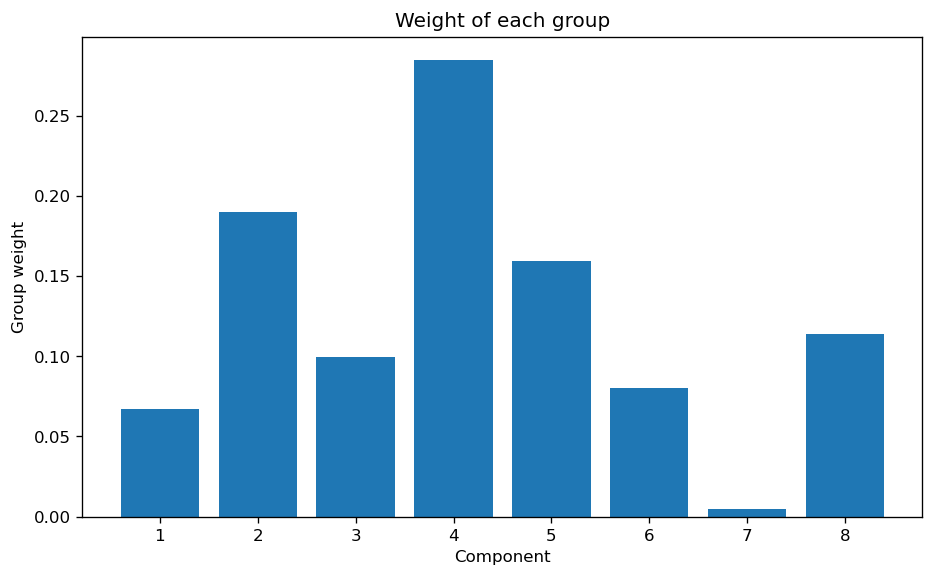

In [33]:
fig = plt.figure(figsize=(7,4), dpi=120)
axes = fig.add_axes([0,0,1,1])
groups = np.arange(len(bay_gauss.weights_))
axes.bar(groups, bay_gauss.weights_, align='center', alpha=1.0)
plt.xticks(groups, groups + 1)
plt.ylabel('Group weight')
plt.xlabel('Component')
plt.title('Weight of each group')
plt.show()

### Run again with fixed components

Although the result of the above is not absolutely convincing as three groups it gives an idea of what is achievable by using this method to pick the appropriate number of components.

Later in the notebook we will look into using a Principle Component Analysis (PCA) before the bayesian gaussian mixing to see if this helps. We will also look into targeting specific features so that the features of the algorithm can be explored in more detail.

For now we will proceed with the known 3-components.

In [34]:
# run again with fixed components, and full covariance type
bay_gauss = BayesianGaussianMixture(n_components=3, covariance_type='full', weight_concentration_prior_type='dirichlet_process', mean_precision_prior=1, weight_concentration_prior=1, init_params='kmeans', random_state=12)

In [35]:
res_bay_gauss = bay_gauss.fit_predict(df.iloc[:,:-1])

In [36]:
res_bay_gauss

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [37]:
pred_bay_gauss = fix_group_names(res_bay_gauss)
pred_bay_gauss

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [38]:
acc_bay_gauss = accuracy_score(y_true, pred_bay_gauss)
f"{acc_bay_gauss*100:.1f}%"

'98.9%'

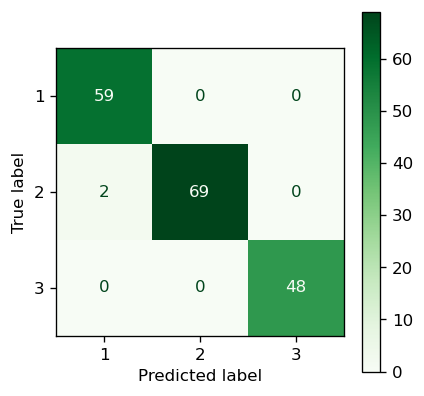

In [39]:
fig = plt.figure(figsize=(3,3), dpi=120)
axes = fig.add_axes([0,0,1,1])
cm = ConfusionMatrixDisplay.from_predictions(y_true, pred_bay_gauss, cmap='Greens', ax=axes);

In [40]:
acc_results = pd.DataFrame({"Accuracy [%]": [acc_k_means, acc_gauss, acc_bay_gauss]}, index=["K-Means","Gaussian Mixing","Bayesian Gaussian Mixing"]) * 100
acc_results

Accuracy [%]
K-Means                      94.943820
Gaussian Mixing              96.629213
Bayesian Gaussian Mixing     98.876404

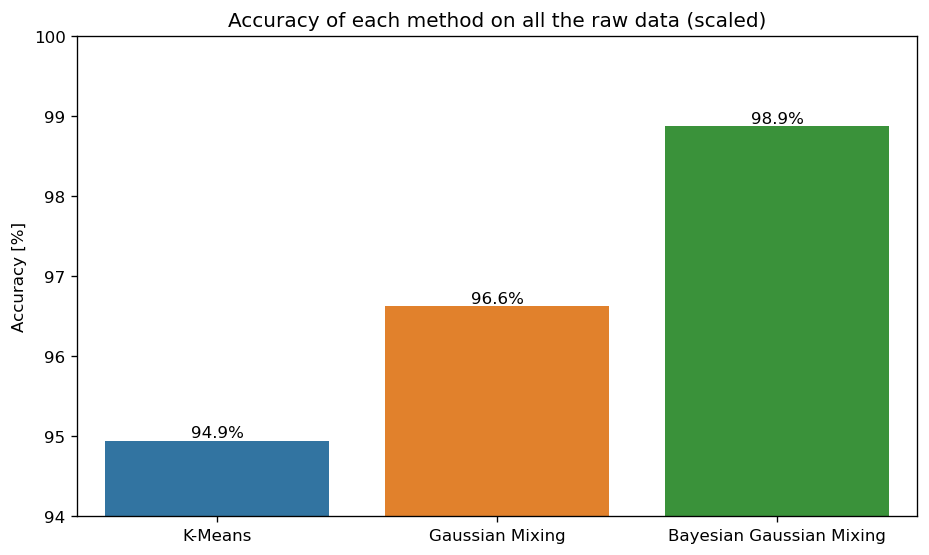

In [41]:
fig = plt.figure(figsize=(7, 4), dpi=120)
axes = fig.add_axes([0,0,1,1])
plot=sns.barplot(x=acc_results.index, y="Accuracy [%]", data=acc_results)
plt.ylabel(acc_results.columns[0])
plt.bar_label(plot.containers[0], fmt='%.1f%%')
axes.set_ylim(bottom=94, top=100)
axes.set_title("Accuracy of each method on all the raw data (scaled)")
plt.show()

# Explore the fit

Now we will take a look at the shapes and sizes of the distributions that the Bayesian Gaussian Mixture Model generated when it was fit to the data.

The ellipsoids in the following plot represent the covariance and mean produced from the analysis compared to the real labels (scatter).

*Note: to keep the output graph managable the feature "alcohol" is plotted against all the other features*

In [42]:
def plot_results(data, pred, means, covariances, target_name, title):

    targ_col_index = data.columns.get_loc(target_name)
    j = 0

    fig, axes = plt.subplots(nrows=4,ncols=3, sharex=True, sharey=True, figsize=(10,13), dpi=120)
    fig.suptitle(f"{title} - All features compared to {target_name}", fontsize=16)
    fig.tight_layout()

    target_data = data.to_numpy()
    cmap = get_cmap("Set1")
    color_iter = itertools.cycle(cmap.colors[0:3])
    
    for x in range(13):

        if x != targ_col_index:
            target_data = data.iloc[:,[targ_col_index,x]].to_numpy()
            target_means = means[:,[targ_col_index,x]]
            target_covariances = covariances[:,[targ_col_index,x]][:,:,[targ_col_index,x]]
        
            axis = fig.get_axes()[j]
            j = j + 1
            for i, (mean, covar, color) in enumerate(zip(target_means, target_covariances, color_iter)):
                v, w = linalg.eigh(covar)
                v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
                u = w[0] / linalg.norm(w[0])
                # as the Dirichlet Process may not use every component it has access to
                # unless it needs it, the redundant data should not be plotted.
                if not np.any(pred == i):
                    continue
                axis.scatter(target_data[pred == i, 0], target_data[pred == i, 1], s=15, color=color, alpha=1.0, linewidths=0.5, edgecolors='w')

                # Plot an ellipse to show the Gaussian component
                angle = np.arctan(u[1] / u[0])
                angle = 180.0 * angle / np.pi  # convert to degrees
                ell = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
                ell.set_clip_box(axis.bbox)
                ell.set_alpha(0.2)
                axis.add_artist(ell)

            axis.set_ylabel(data.columns[x])
            axis.set_xlabel(target_name)
    

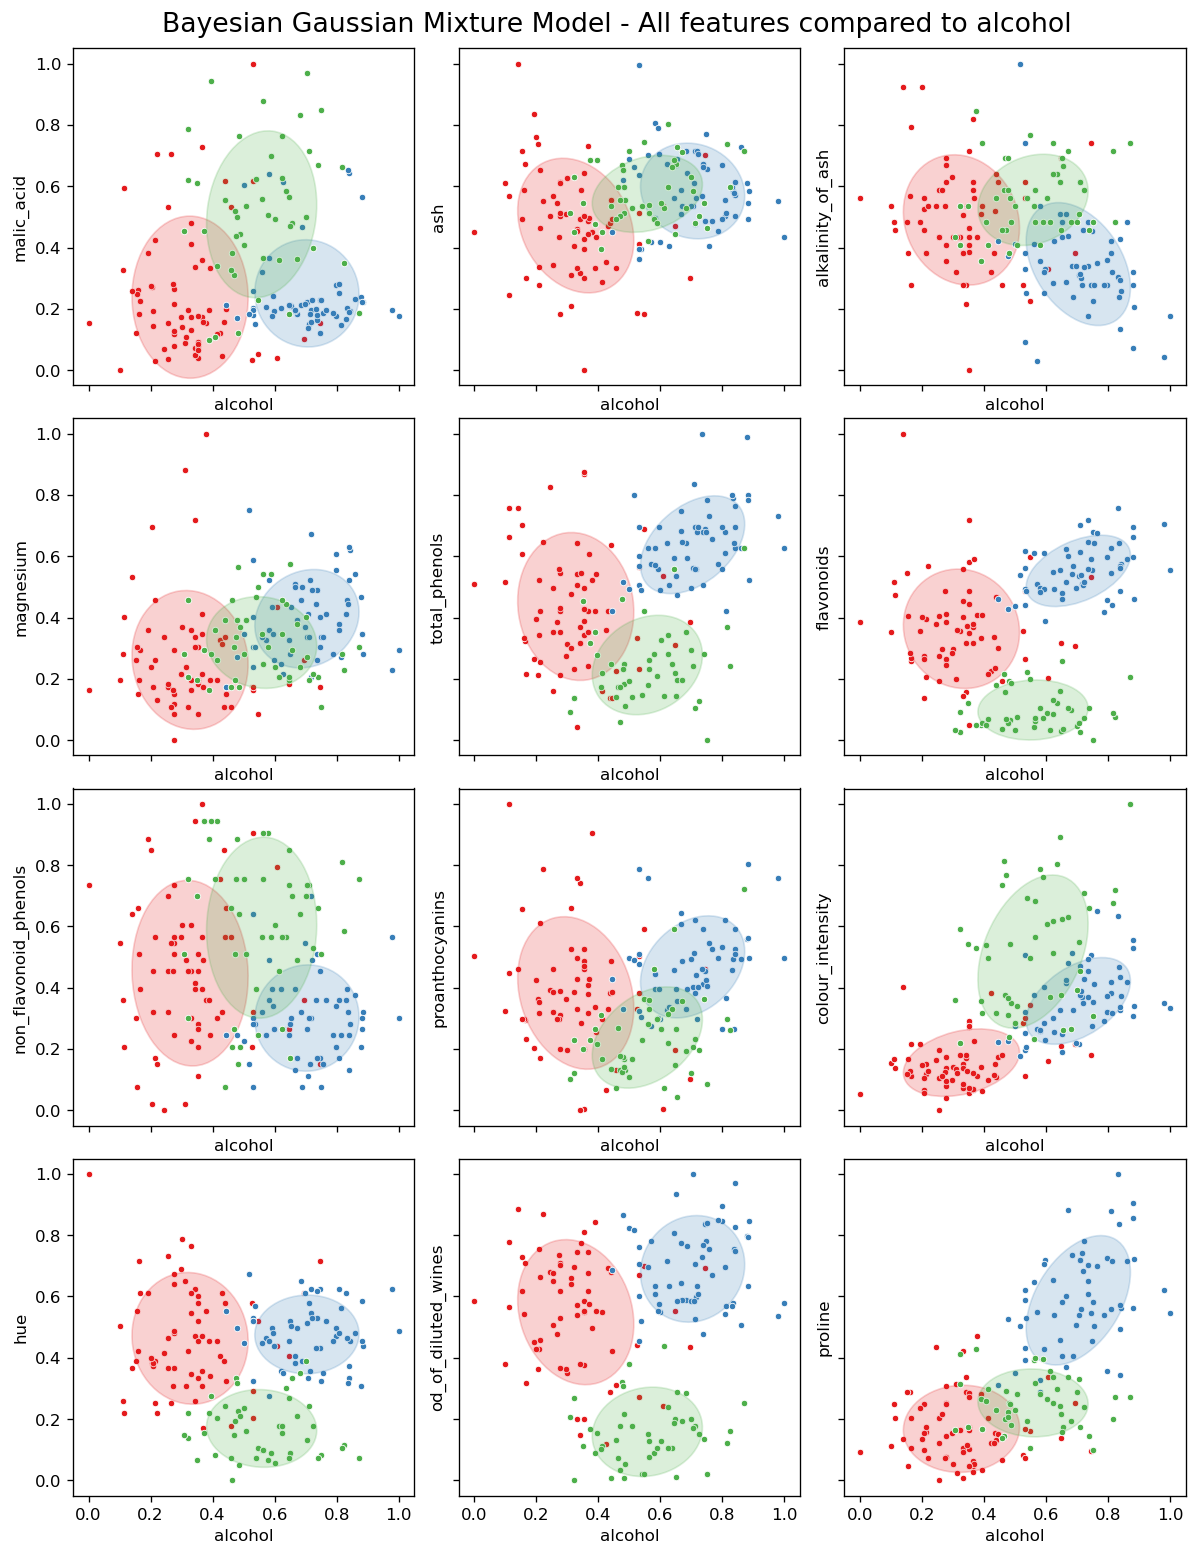

In [43]:
plot_results(df, res_bay_gauss, bay_gauss.means_, bay_gauss.covariances_, 'alcohol', "Bayesian Gaussian Mixture Model")

## Principle Component Analysis (PCA) for finding groups

As discussed earlier in the notebook, although the Bayesian Gaussian Mixing method of clustering is capable of inferring the appropriate number of groups directly from the data, it would appear that with this dataset it stuggled a little to pick out what we know to be three distinct groups.

In theory, the additional groups picked out could be valid, and represent a more refined grouping that we are not interested in in this case, or it could be overfitting due to the dataset being small.

Regardless, one possible solution to this problem is to distill the data using a PCA.

This will also allow a more concise visualisation of all the data in two dimensions.

In [44]:
pca = PCA(n_components=2)

In [45]:
res_pca = pca.fit_transform(df.iloc[:,:-1])
res_pca.shape

(178, 2)

In [46]:
pca_df = pd.DataFrame({"PCA1": res_pca[:,0], "PCA2": res_pca[:,1], "label": df.label}, index=df.index)
pca_df

PCA1      PCA2  label
wine_id                           
1       -0.706336 -0.253193      1
2       -0.484977 -0.008823      1
3       -0.521172 -0.189187      1
4       -0.821644 -0.580906      1
5       -0.202546 -0.059467      1
...           ...       ...    ...
174      0.739510 -0.471901      3
175      0.581781 -0.348366      3
176      0.626313 -0.546857      3
177      0.572991 -0.425516      3
178      0.701764 -0.513505      3

[178 rows x 3 columns]

### Plot of all the data as a two component PCA

The following plot shows the distribution of all 13 features represented as a two component PCA.

The plot also distinguishes the real labels of the data so that it is possible to both see where the three labels fall, and their individual probability distributions.

#### Easy to separate the groups?

Although it may seem intuative when you can see the answer, if you ignore the colours, it is just a U-shaped set of points with no really obvious divides.

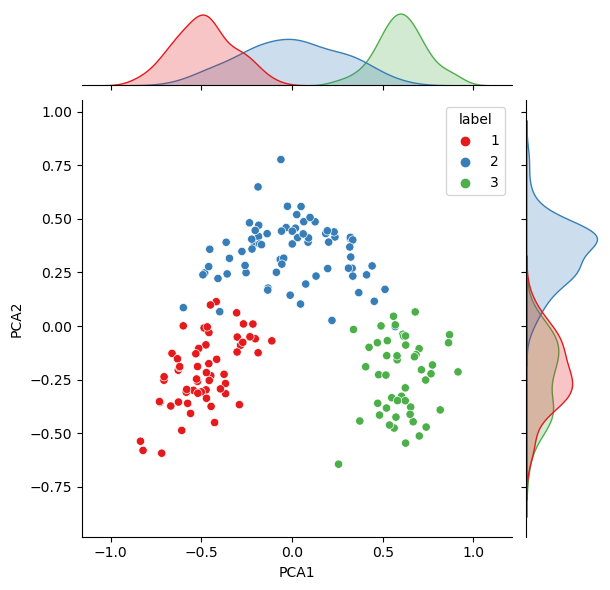

In [47]:
sns.jointplot(x = 'PCA1', y = 'PCA2', kind = "scatter", hue='label', palette='Set1', data = pca_df)
plt.show()

## Gaussian Mixing BIC and AIC for the PCA

In [48]:
components = 8
bic, aic = get_bic_aic_curves(components, pca_df.iloc[:,:-1])
stats = pd.DataFrame({"bic": bic, "aic": aic}, index=np.arange(1,components+1))
stats.index.name = "components"
stats

bic         aic
components                        
1           359.214478  343.305561
2           201.265570  166.265951
3           183.554846  129.464526
4           202.420107  129.239085
5           225.839930  133.568207
6           237.940201  126.577776
7           269.079602  138.626476
8           280.514034  130.970207

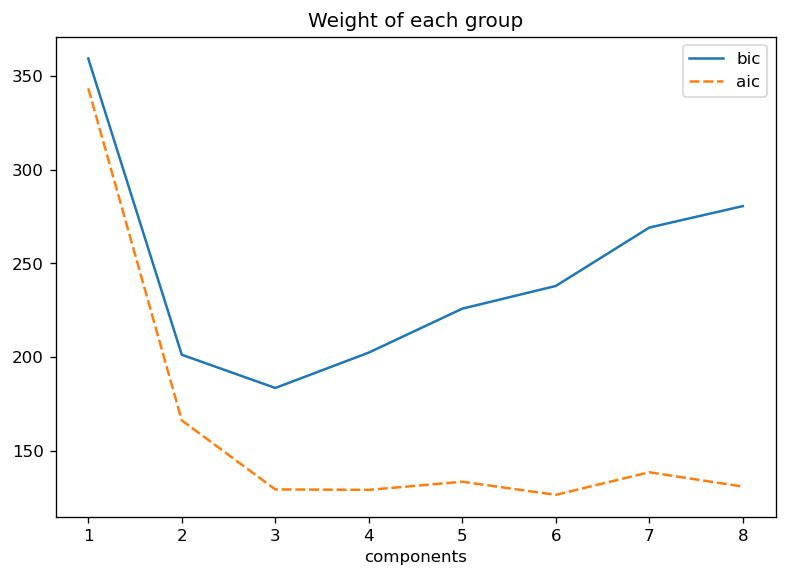

In [49]:
fig = plt.figure(figsize=(6,4), dpi=120)
axes = fig.add_axes([0,0,1,1])
sns.lineplot(data=stats, ax=axes)
plt.title('Weight of each group')
plt.show()

## Bayesian Gaussian Mixing of the PCA

In [50]:
bay_gauss_pca = BayesianGaussianMixture(n_components=8, covariance_type='full', init_params='kmeans', weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=0.1, random_state=SEED)

In [51]:
res_bay_gauss_pca = bay_gauss_pca.fit_predict(pca_df.iloc[:,:-1])
res_bay_gauss_pca

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4])

In [52]:
bay_gauss_pca_weights = bay_gauss_pca.weights_
bay_gauss_pca_weights

array([5.88844454e-03, 5.85343962e-03, 3.55272053e-01, 3.43135050e-01,
       2.89314197e-01, 4.88380655e-04, 4.43981547e-05, 4.03619589e-06])

### The grouping is much clearer

Having reduced the overall complexity of the data it is much easier (in this case) to land on a grouping.

However, as you will note from the accuracy result it is not as accurate as using the full untouched input data.

By definition using a PCA will lose some information, which is likely why we lose some accuracy, so this method is really intended as an example of how you can change approach to get a different view on the data. 

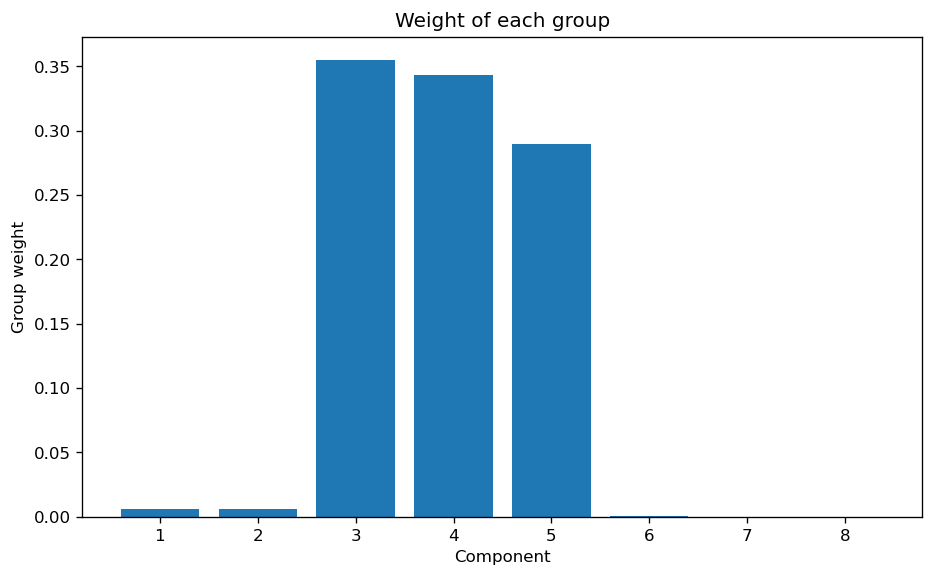

In [53]:
fig = plt.figure(figsize=(7,4), dpi=120)
axes = fig.add_axes([0,0,1,1])
groups = np.arange(len(bay_gauss_pca_weights))
axes.bar(groups, bay_gauss_pca_weights, align='center', alpha=1.0)
plt.xticks(groups, groups + 1)
plt.ylabel('Group weight')
plt.xlabel('Component')
plt.title('Weight of each group')
plt.show()

In [54]:
pred_bay_gauss_pca = fix_group_names(res_bay_gauss_pca)
pred_bay_gauss_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [55]:
acc_bay_gauss = accuracy_score(y_true, pred_bay_gauss_pca)
f"{acc_bay_gauss*100:.1f}%"

'96.1%'

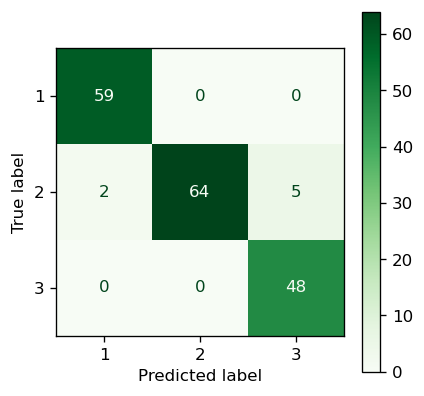

In [56]:
fig = plt.figure(figsize=(3,3), dpi=120)
axes = fig.add_axes([0,0,1,1])
cm = ConfusionMatrixDisplay.from_predictions(y_true, pred_bay_gauss_pca, cmap='Greens', ax=axes);

In [57]:
def plot_results_pair(data, pred, means, covariances, title="", axes=None):

    if axes==None:
        fig, axes = plt.subplots(figsize=(5,5), dpi=120)
        fig.suptitle(f"{title}", fontsize=12)
        fig.tight_layout()
        axes.set_ylabel(data.columns[1])
        axes.set_xlabel(data.columns[0])
        
    axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    target_data = data.to_numpy()
    cmap = get_cmap("Set1")
    color_iter = itertools.cycle(cmap.colors)

    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the Dirichlet Process may not use every component it has access to
        # unless it needs it, the redundant data should not be plotted.
        if not np.any(pred == i):
            continue
        axes.scatter(target_data[pred == i, 0], target_data[pred == i, 1], s=20, color=color, alpha=1.0, linewidths=0.5, edgecolors='w')

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(axes.bbox)
        ell.set_alpha(0.3)
        axes.add_artist(ell)
    

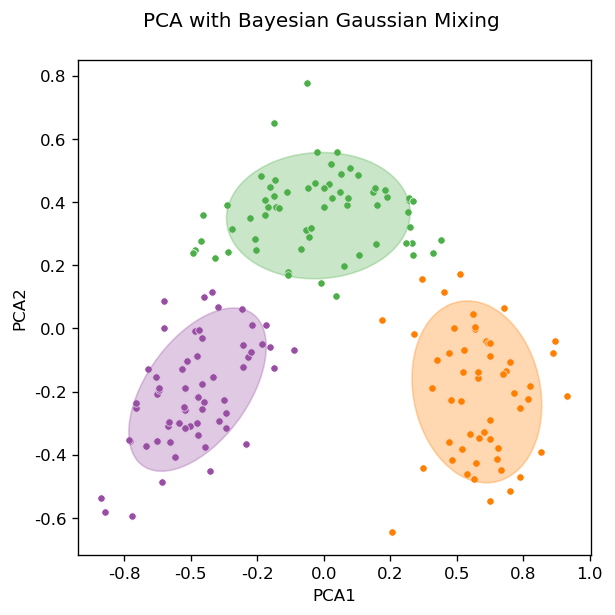

In [58]:
plot_results_pair(pca_df, res_bay_gauss_pca , bay_gauss_pca.means_, bay_gauss_pca.covariances_, "PCA with Bayesian Gaussian Mixing")

# A more specific example of how the methods differ

To take a closer look at the differences between the three methods of clustering we will extract two specific features and run the clustering algorithms on only those features.

The advantage of this in terms of reviewing the methods is that we can visualise what is going on in a 2D-plane (i.e. a normal 2D graph)

The components that have been selected are:

In [59]:
feat1 = 'colour_intensity'
feat2 = 'od_of_diluted_wines'

## Why this data?

The reason for picking this pair is due to the challenges the dataset throws up for the different clustering algorithms. 

As you can see there are two clusters that are fairly intermingled (1 & 2). In addition, clusters 2 & 3 have quite elongated distributions compared to cluster 1 which is more rounded, or circular.

In theory, the gaussian mixing methods should fair quite a bit better than K-Means as they have the ability to accurately mould their distribution characteristics to the elongated distributions, whereas K-Means cannot as it is limited to a circular representation. 

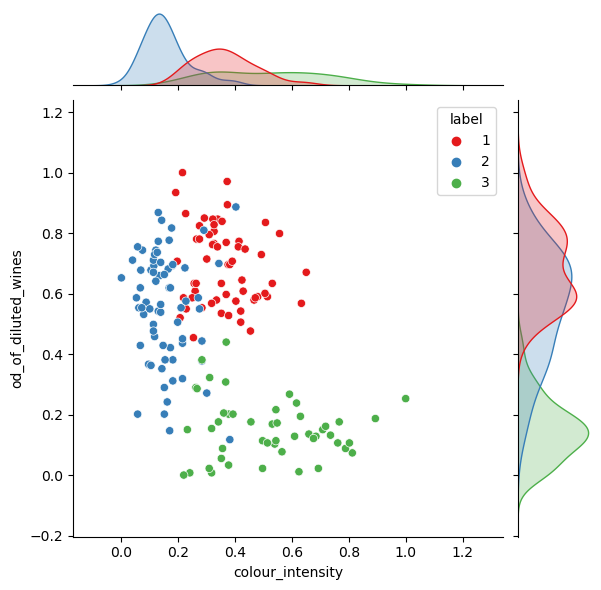

In [60]:
sns.jointplot(x = feat1, y = feat2, kind = "scatter", hue='label', palette='Set1', data = df)
plt.show()

In [61]:
selected_df = df.loc[:,[feat1, feat2, 'label']]
selected_df

colour_intensity  od_of_diluted_wines  label
wine_id                                              
1                0.372014             0.970696      1
2                0.264505             0.780220      1
3                0.375427             0.695971      1
4                0.556314             0.798535      1
5                0.259386             0.608059      1
...                   ...                  ...    ...
174              0.547782             0.172161      3
175              0.513652             0.106227      3
176              0.761092             0.106227      3
177              0.684300             0.128205      3
178              0.675768             0.120879      3

[178 rows x 3 columns]

## K-Means

In [62]:
k_means_sel = KMeans(n_clusters=3, n_init='auto', random_state=SEED)

In [63]:
res_k_means_sel = k_means_sel.fit_predict(selected_df.iloc[:,:-1])
res_k_means_sel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [64]:
pred_k_means_sel = fix_group_names(res_k_means_sel)
pred_k_means_sel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [65]:
acc_k_means_sel = accuracy_score(y_true, pred_k_means_sel)
f"{acc_k_means_sel*100:.1f}%"

'73.6%'

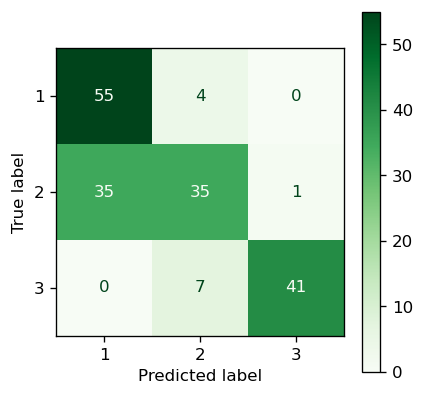

In [66]:
fig = plt.figure(figsize=(3,3), dpi=120)
axes = fig.add_axes([0,0,1,1])
cm = ConfusionMatrixDisplay.from_predictions(y_true, pred_k_means_sel, cmap='Greens', ax=axes);

## Gaussian Mixture Model

In [67]:
gauss_mix_sel = GaussianMixture(n_components=3, covariance_type='full', init_params='kmeans', random_state=SEED)

In [68]:
res_gauss_mix_sel = gauss_mix_sel.fit_predict(selected_df.iloc[:,:-1])
res_gauss_mix_sel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [69]:
pred_gauss_mix_sel = fix_group_names(res_gauss_mix_sel)
pred_gauss_mix_sel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [70]:
acc_gauss_sel = accuracy_score(y_true, pred_gauss_mix_sel)
f"{acc_gauss_sel*100:.1f}%"

'77.0%'

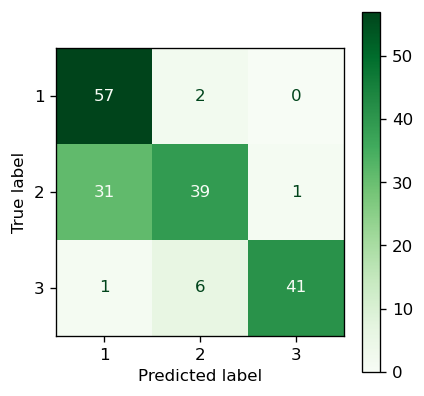

In [71]:
fig = plt.figure(figsize=(3,3), dpi=120)
axes = fig.add_axes([0,0,1,1])
cm = ConfusionMatrixDisplay.from_predictions(y_true, pred_gauss_mix_sel, cmap='Greens', ax=axes);

## Bayesian Gaussian Mixture Model

In this case we will specify 8 components and let the algorithm pick the appropriate amount of components.

In [72]:
bay_gauss_sel = BayesianGaussianMixture(n_components=8, covariance_type='full', init_params='kmeans', weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=0.1, random_state=SEED)

In [73]:
res_bay_gauss_sel = bay_gauss_sel.fit_predict(selected_df.iloc[:,:-1])
res_bay_gauss_sel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2,
       0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

...and as we can see, the result is the algorithm picks out precisely 3 components as we would expect

In [74]:
weights = bay_gauss_sel.weights_
weights

array([3.69499513e-01, 2.66904787e-01, 3.63050542e-01, 4.95601080e-04,
       4.50545376e-05, 4.09586705e-06, 3.72351550e-07, 3.38501409e-08])

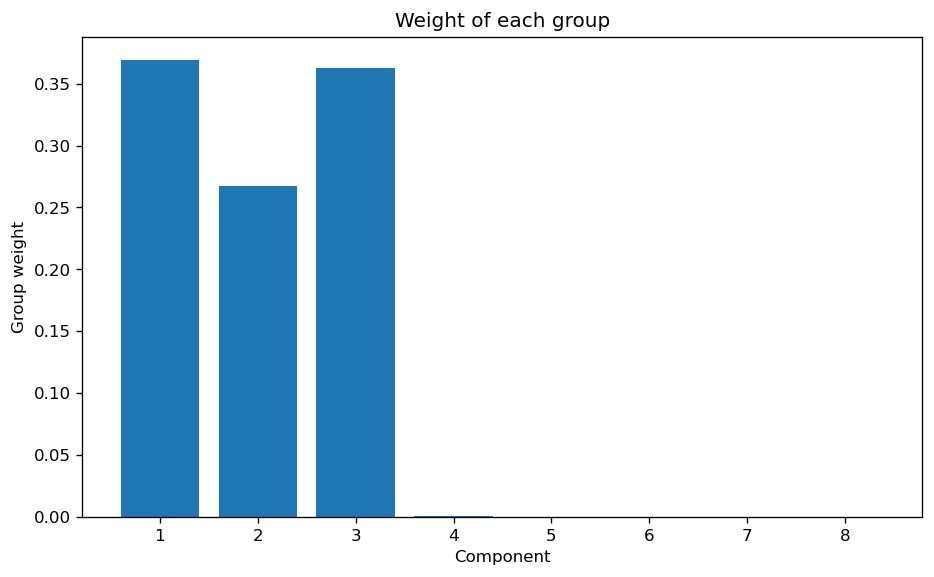

In [75]:
fig = plt.figure(figsize=(7,4), dpi=120)
axes = fig.add_axes([0,0,1,1])
groups = np.arange(len(weights))
axes.bar(groups, weights, align='center', alpha=1.0)
plt.xticks(groups, groups + 1)
plt.ylabel('Group weight')
plt.xlabel('Component')
plt.title('Weight of each group')
plt.show()

In [76]:
pred_bay_gauss_sel = fix_group_names(res_bay_gauss_sel)
pred_bay_gauss_sel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2,
       1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [77]:
acc_bay_gauss_sel = accuracy_score(y_true, pred_bay_gauss_sel)
f"{acc_bay_gauss_sel*100:.1f}%"

'87.6%'

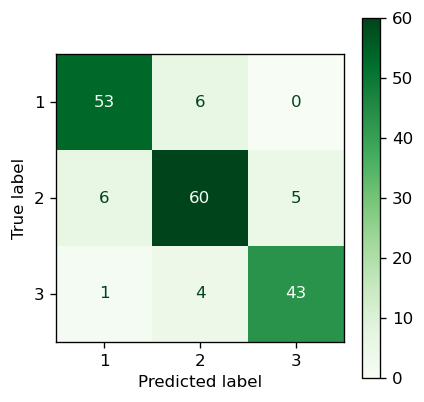

In [78]:
fig = plt.figure(figsize=(3,3), dpi=120)
axes = fig.add_axes([0,0,1,1])
cm = ConfusionMatrixDisplay.from_predictions(y_true, pred_bay_gauss_sel, cmap='Greens', ax=axes);

In [79]:
acc_results_sel = pd.DataFrame({"Accuracy [%]": [acc_k_means_sel, acc_gauss_sel, acc_bay_gauss_sel]}, index=["K-Means","Gaussian Mixing","Bayesian Gaussian Mixing"]) * 100
acc_results_sel

Accuracy [%]
K-Means                      73.595506
Gaussian Mixing              76.966292
Bayesian Gaussian Mixing     87.640449

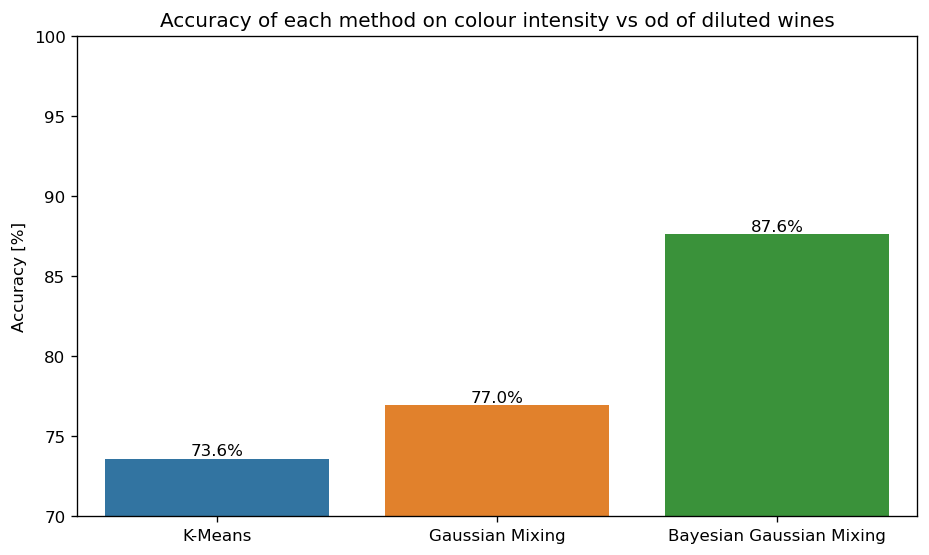

In [80]:
fig = plt.figure(figsize=(7, 4), dpi=120)
axes = fig.add_axes([0,0,1,1])
plot=sns.barplot(x=acc_results_sel.index, y="Accuracy [%]", data=acc_results_sel)
plt.ylabel(acc_results_sel.columns[0])
plt.bar_label(plot.containers[0], fmt='%.1f%%')
axes.set_ylim(bottom=70, top=100)
axes.set_title("Accuracy of each method on colour intensity vs od of diluted wines")
plt.show()

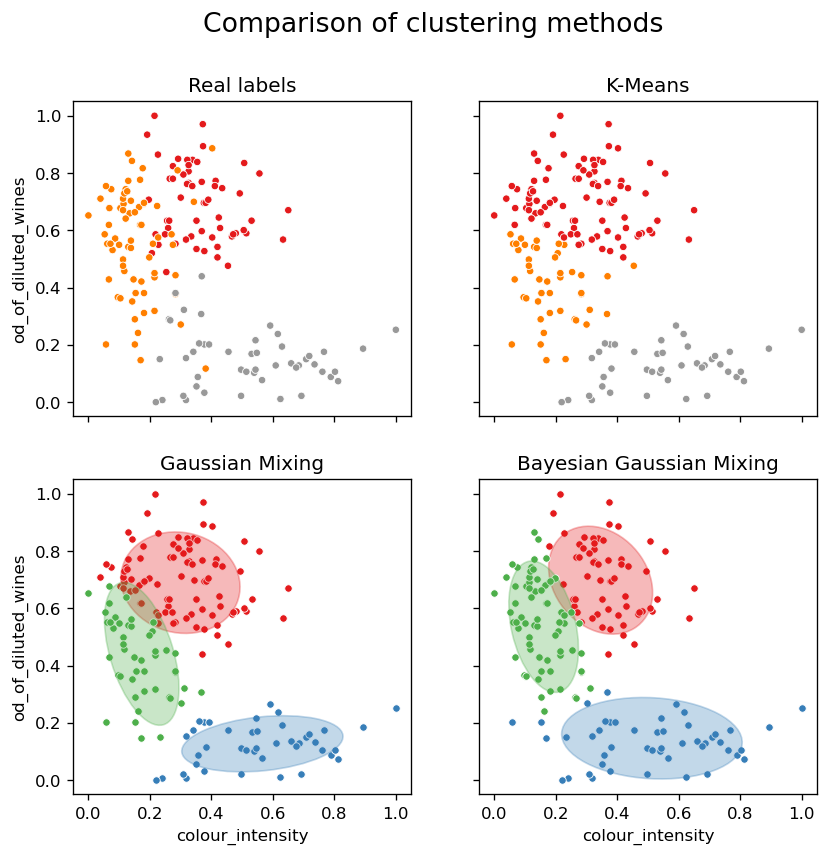

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,7.5), dpi=120)
fig.suptitle(f"Comparison of clustering methods", fontsize=16)

# real labels
axes[0,0].scatter(df[feat1], df[feat2], s=20, c=df['label'], cmap="Set1", alpha=1.0, linewidths=0.5, edgecolors='w')
axes[0,0].set_title('Real labels')

# k-Means
axes[0,1].scatter(df[feat1], df[feat2], s=20, c=pred_k_means_sel, cmap="Set1", alpha=1.0, linewidths=0.5, edgecolors='w')
axes[0,1].set_title('K-Means')

# Gaussian Mixing
plot_results_pair(selected_df, res_gauss_mix_sel, gauss_mix_sel.means_, gauss_mix_sel.covariances_, axes=axes[1,0])
axes[1,0].set_title('Gaussian Mixing')

plot_results_pair(selected_df, res_bay_gauss_sel, bay_gauss_sel.means_, bay_gauss_sel.covariances_, axes=axes[1,1])
axes[1,1].set_title('Bayesian Gaussian Mixing')

# axes titles
axes[1,0].set_xlabel(feat1)
axes[1,1].set_xlabel(feat1)
axes[0,0].set_ylabel(feat2)
axes[1,0].set_ylabel(feat2)

plt.show()